In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_confusion_matrix

In [63]:
df = pd.read_csv("Churn_Modelling.csv")
df = df.drop(["RowNumber", "CustomerId", "Surname", "EstimatedSalary", "HasCrCard", "Tenure"], axis = 1)
df

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,0.00,2,0,0
9996,516,France,Male,35,57369.61,1,1,0
9997,709,France,Female,36,0.00,1,1,1
9998,772,Germany,Male,42,75075.31,2,0,1


In [64]:
Y, X = dmatrices('Exited ~ 0 + CreditScore + Geography + Gender + Age + Balance + NumOfProducts + IsActiveMember',
                 df,return_type="dataframe")
y = Y['Exited'].values
y

array([1., 0., 1., ..., 1., 1., 0.])

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [66]:
model = neighbors.KNeighborsClassifier(n_neighbors=15,
                                       weights='uniform',
                                       p=2)

In [67]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [68]:
prediction_on_training = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

0.8018571428571428


Text(0.5, 1.0, 'Accuracy vs Number of Nearest Neighbors')

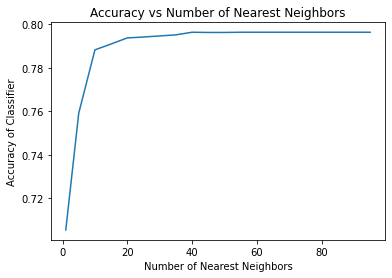

In [69]:
def cv_accuracy_score(X, y, nn): 
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=10, shuffle=True).split(X, y)
    for train, holdout in kfold:
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        model.fit(X_train, y_train)
        
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = pd.Series(accuracies).mean()
    return average_accuracy

nn = [1] + [(x + 1) * 5 for x in range(19)]
scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]

plt.plot(nn, scores)
plt.xlabel('Number of Nearest Neighbors')
plt.ylabel('Accuracy of Classifier')
plt.title('Accuracy vs Number of Nearest Neighbors')

In [73]:
final_model = neighbors.KNeighborsClassifier(n_neighbors=10,
                                       weights='uniform',
                                       p=2)
final_model.fit(X_train, y_train)
final_prediction_on_training = final_model.predict(X_train)
print(metrics.accuracy_score(y_train, final_prediction_on_training))

0.8044285714285714


C:\Users\pokem\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0, 0.5, 'Actual label')

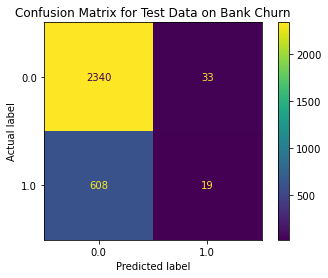

In [71]:
    plot_confusion_matrix(final_model, X_test, y_test)
    plt.grid(False)
    plt.title('Confusion Matrix for Test Data on Bank Churn')
    plt.ylabel('Actual label')